## Importing Libraries

In [1]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

/opt/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df=pd.read_csv("data.csv")
df.head()
print(df.shape)

(1432, 18)


## Preprcessing dataframe

In [3]:
del df["Unnamed: 0"]

In [4]:
df['Do you currently have a mental health disorder?'].value_counts()
d = []
for row in df['Do you currently have a mental health disorder?']:
        if (row =='Yes'):    d.append(1)
        elif (row =='Maybe'):  d.append(2)
        elif (row =='No'):  d.append(3)
df['Do you currently have a mental health disorder?'] = d
df['Do you currently have a mental health disorder?'].value_counts()

1    575
3    530
2    327
Name: Do you currently have a mental health disorder?, dtype: int64

## Splitting Datatset into train and test

In [5]:
df1 = df
df2 = df[['Do you currently have a mental health disorder?']]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(df1, df2, test_size = 0.20, random_state = 5)

## Applying Response code

In [7]:
def get_gv_fea_dict(alpha, feature, df):
    value_count = df[feature].value_counts()
    gv_dict = dict()
    for i, denominator in value_count.items():
        vec = []
        for k in range(1,4):
            cls_cnt = df.loc[(df['Do you currently have a mental health disorder?']==k) & (df[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 30*alpha))

        gv_dict[i]=vec
    return gv_dict

def get_gv_feature(alpha, feature, df):
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    value_count = df[feature].value_counts()
    
    gv_fea = []
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/3,1/3,1/3])
    return gv_fea

## Converting all features into Response conding

In [8]:
alpha=1
feature_responseCoding_1 = np.array(get_gv_feature(alpha, "Are you self-employed?",X_train))
feature_responseCoding_2 = np.array(get_gv_feature(alpha, "Do you have previous employers?",X_train))
feature_responseCoding_3 = np.array(get_gv_feature(alpha, "Would you be willing to bring up a physical health issue with a potential employer in an interview?",X_train))
feature_responseCoding_4 = np.array(get_gv_feature(alpha, "Do you feel that being identified as a person with a mental health issue would hurt your career?",X_train))
feature_responseCoding_5 = np.array(get_gv_feature(alpha, "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?",X_train))
feature_responseCoding_6 = np.array(get_gv_feature(alpha, "How willing would you be to share with friends and family that you have a mental illness?",X_train))
feature_responseCoding_7 = np.array(get_gv_feature(alpha, "Do you have a family history of mental illness?",X_train))
# feature_responseCoding_8 = np.array(get_gv_feature(alpha, "Do you currently have a mental health disorder?",X_train))
feature_responseCoding_9 = np.array(get_gv_feature(alpha, "Have you been diagnosed with a mental health condition by a medical professional?",X_train))
feature_responseCoding_10 = np.array(get_gv_feature(alpha, "Have you ever sought treatment for a mental health issue from a mental health professional?",X_train))
feature_responseCoding_11 = np.array(get_gv_feature(alpha, "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?",X_train))
feature_responseCoding_12 = np.array(get_gv_feature(alpha, "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",X_train))
feature_responseCoding_13 = np.array(get_gv_feature(alpha, "What is your age?",X_train))
feature_responseCoding_14 = np.array(get_gv_feature(alpha, "Which of the following best describes your work position?",X_train))
feature_responseCoding_15 = np.array(get_gv_feature(alpha, "Do you work remotely?",X_train))
feature_responseCoding_16 = np.array(get_gv_feature(alpha, "Which of the following best describes your work position?",X_train))
feature_responseCoding_17 = np.array(get_gv_feature(alpha, "Which of the following best describes your work position?",X_train))


alpha=1
feature_responseCoding_1t = np.array(get_gv_feature(alpha, "Are you self-employed?",X_test))
feature_responseCoding_2t = np.array(get_gv_feature(alpha, "Do you have previous employers?",X_test))
feature_responseCoding_3t = np.array(get_gv_feature(alpha, "Would you be willing to bring up a physical health issue with a potential employer in an interview?",X_test))
feature_responseCoding_4t = np.array(get_gv_feature(alpha, "Do you feel that being identified as a person with a mental health issue would hurt your career?",X_test))
feature_responseCoding_5t = np.array(get_gv_feature(alpha, "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?",X_test))
feature_responseCoding_6t = np.array(get_gv_feature(alpha, "How willing would you be to share with friends and family that you have a mental illness?",X_test))
feature_responseCoding_7t = np.array(get_gv_feature(alpha, "Do you have a family history of mental illness?",X_test))
# feature_responseCoding_8t = np.array(get_gv_feature(alpha, "Do you currently have a mental health disorder?",X_test))
feature_responseCoding_9t = np.array(get_gv_feature(alpha, "Have you been diagnosed with a mental health condition by a medical professional?",X_test))
feature_responseCoding_10t = np.array(get_gv_feature(alpha, "Have you ever sought treatment for a mental health issue from a mental health professional?",X_test))
feature_responseCoding_11t = np.array(get_gv_feature(alpha, "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?",X_test))
feature_responseCoding_12t = np.array(get_gv_feature(alpha, "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",X_test))
feature_responseCoding_13t = np.array(get_gv_feature(alpha, "What is your age?",X_test))
feature_responseCoding_14t = np.array(get_gv_feature(alpha, "Which of the following best describes your work position?",X_test))
feature_responseCoding_15t = np.array(get_gv_feature(alpha, "Do you work remotely?",X_test))
feature_responseCoding_16t = np.array(get_gv_feature(alpha, "Which of the following best describes your work position?",X_test))
feature_responseCoding_17t = np.array(get_gv_feature(alpha, "Which of the following best describes your work position?",X_test))


train_x_responseCoding = np.hstack((feature_responseCoding_1, feature_responseCoding_2,feature_responseCoding_3,feature_responseCoding_4,feature_responseCoding_5,feature_responseCoding_6,feature_responseCoding_7,feature_responseCoding_9,feature_responseCoding_10,feature_responseCoding_11,feature_responseCoding_12,feature_responseCoding_13,feature_responseCoding_14,feature_responseCoding_15,feature_responseCoding_16,feature_responseCoding_17))
test_x_responding = np.hstack((feature_responseCoding_1t, feature_responseCoding_2t,feature_responseCoding_3t,feature_responseCoding_4t,feature_responseCoding_5t,feature_responseCoding_6t,feature_responseCoding_7t,feature_responseCoding_9t,feature_responseCoding_10t,feature_responseCoding_11t,feature_responseCoding_12t,feature_responseCoding_13t,feature_responseCoding_14t,feature_responseCoding_15t,feature_responseCoding_16t,feature_responseCoding_17t))

In [9]:
print("train_x_responseCoding:",train_x_responseCoding.shape)
print("test_x_responding :",test_x_responding.shape)


train_x_responseCoding: (1145, 48)
test_x_responding : (287, 48)


## Confusion Matrix Function

In [10]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)

    B =(C/C.sum(axis=0))
    
    A =(((C.T)/(C.sum(axis=1))).T) 
    
    labels = [1,2,3]


    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

  
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    

    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

## RANDOM MODEL

Random model Accuracy:  0.2229965156794425
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


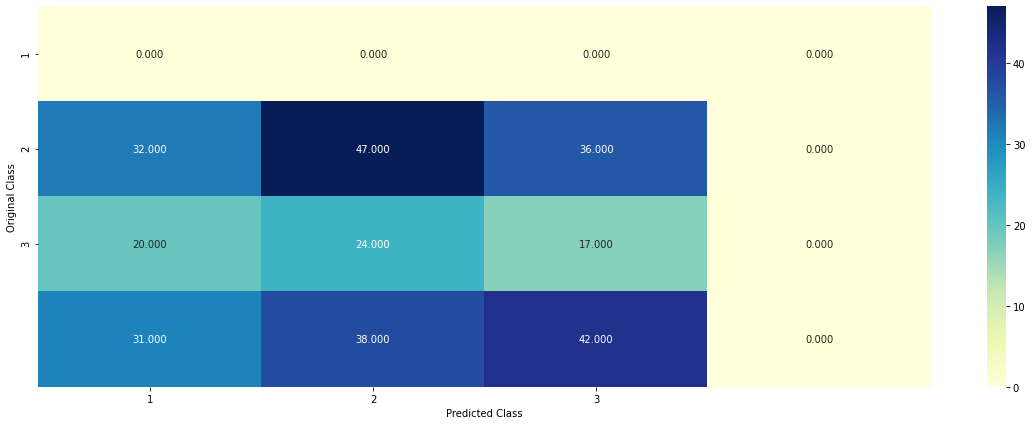

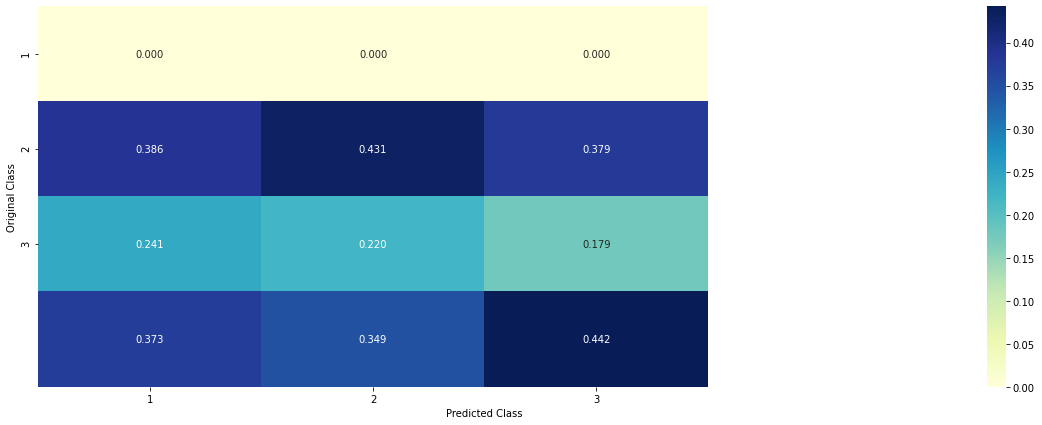

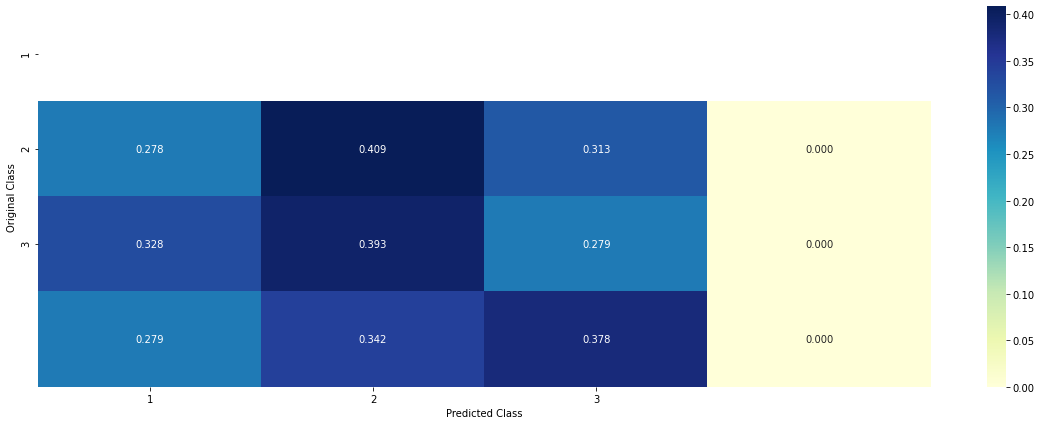

In [11]:
test_data_len = X_test.shape[0]
test_predicted_y = np.zeros((test_data_len,3))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,3)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])

predicted_y =np.argmax(test_predicted_y, axis=1)

print("Random model Accuracy: ", metrics.accuracy_score(Y_test, predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

## Decision Tree Classifier

In [12]:
md = DecisionTreeClassifier(criterion="entropy",splitter = 'best',max_depth = 4)
md.fit(train_x_responseCoding,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
pred_tree = md.predict(test_x_responding)

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, pred_tree))

DecisionTrees's Accuracy:  0.6376306620209059


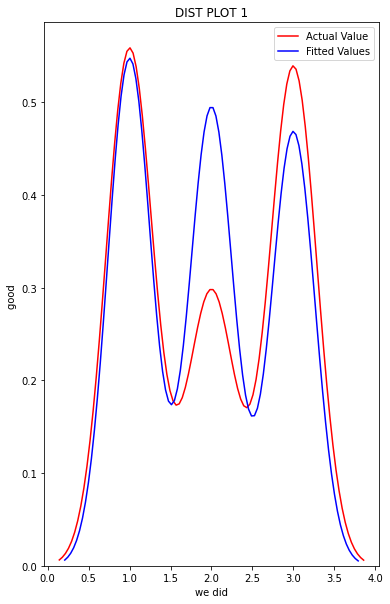

In [15]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred_tree, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('DIST PLOT 1')
plt.xlabel('we did')
plt.ylabel('good ')
plt.show()
plt.close()

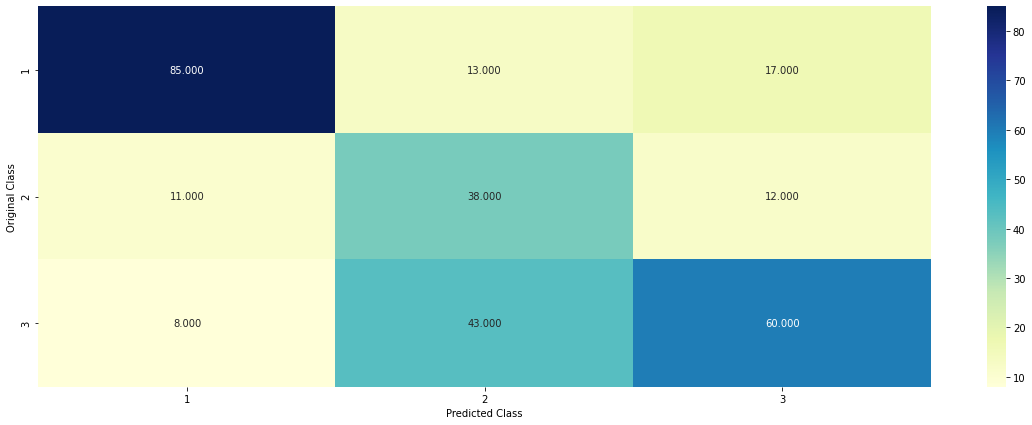

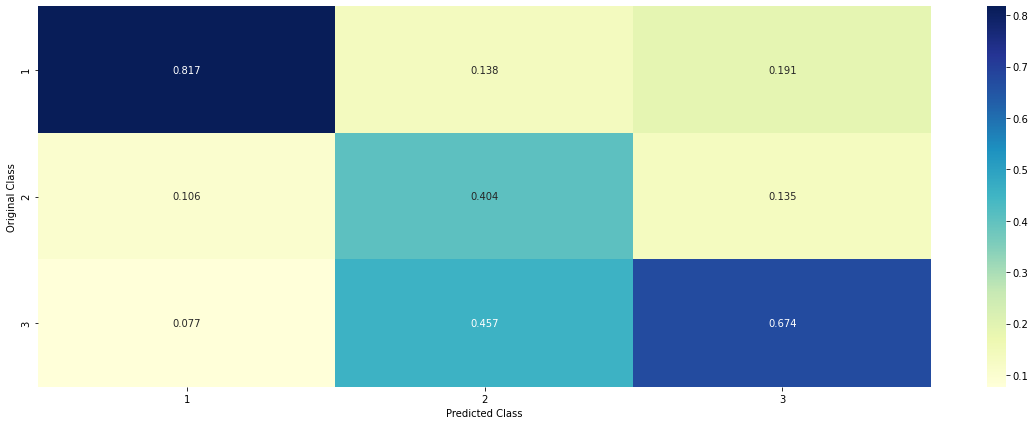

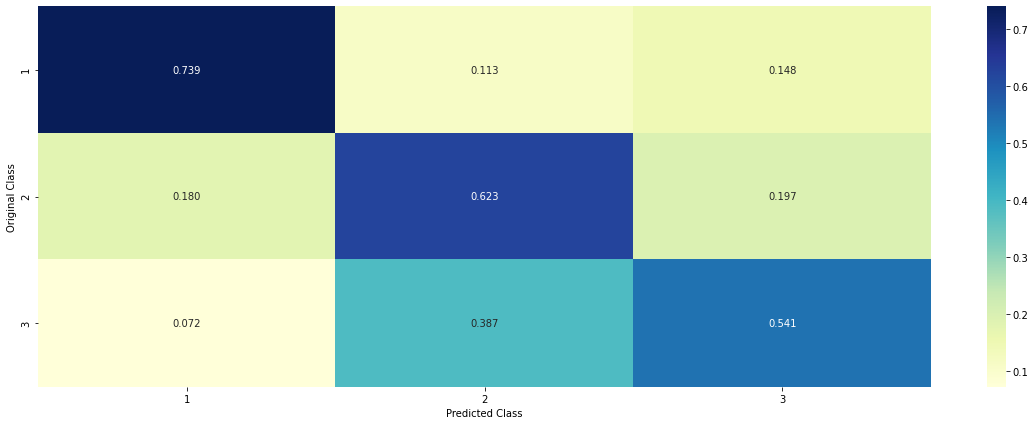

In [16]:
plot_confusion_matrix(Y_test, pred_tree)


<h2>
Now using Random Forest Classifier
</h2>

In [17]:
clf = RandomForestClassifier(max_depth=5,random_state=0)
clf.fit(train_x_responseCoding,Y_train)
pred_random = clf.predict(test_x_responding)
pred_random2 = clf.predict(train_x_responseCoding)

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [18]:
print("DecisionTrees's TRAIN Accuracy: RANDOM FOREST ", metrics.accuracy_score(Y_train, pred_random2))
print("DecisionTrees's Accuracy: RANDOM FOREST ", metrics.accuracy_score(Y_test, pred_random))

DecisionTrees's TRAIN Accuracy: RANDOM FOREST  0.8131004366812227
DecisionTrees's Accuracy: RANDOM FOREST  0.7700348432055749


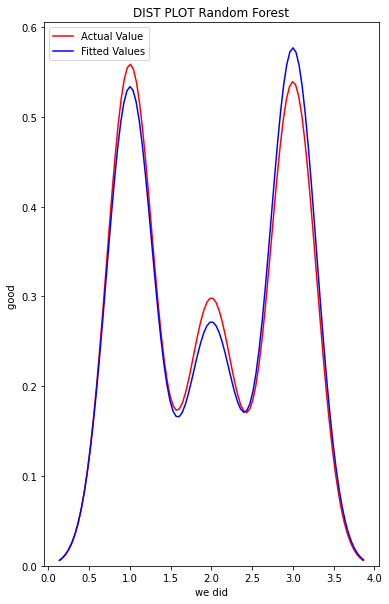

In [19]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred_random, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('DIST PLOT Random Forest')
plt.xlabel('we did')
plt.ylabel('good ')
plt.show()
plt.close()

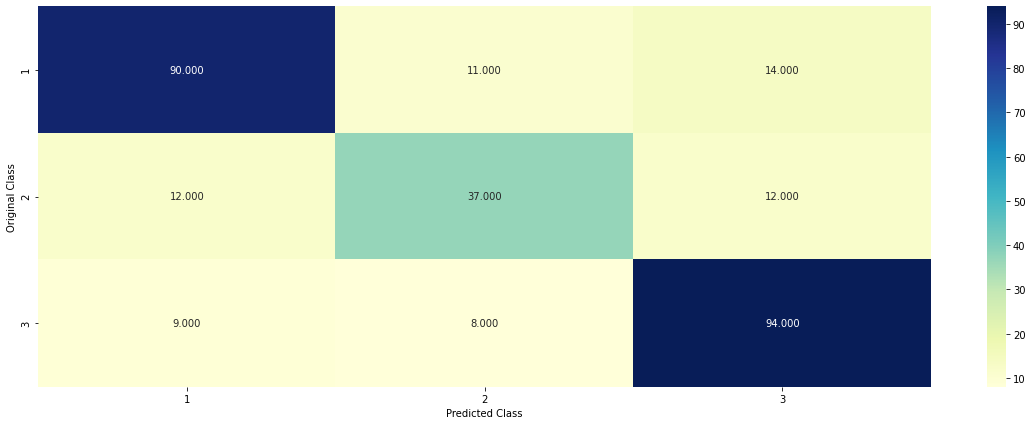

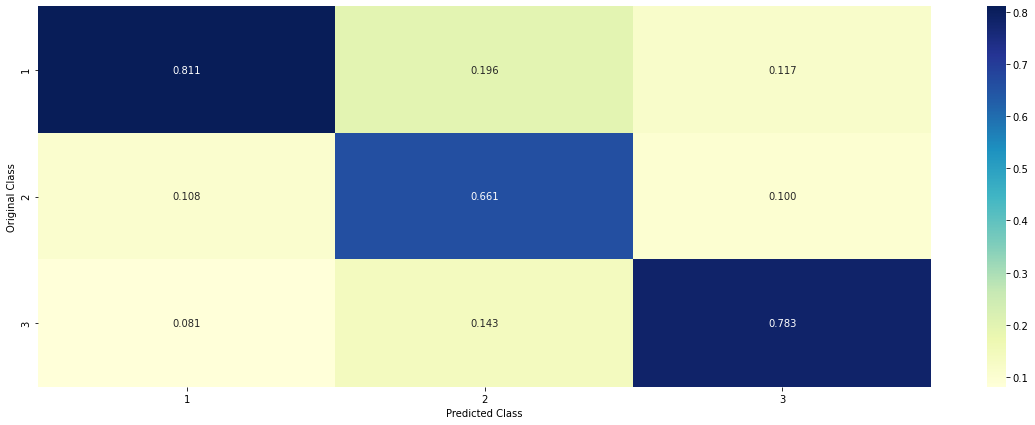

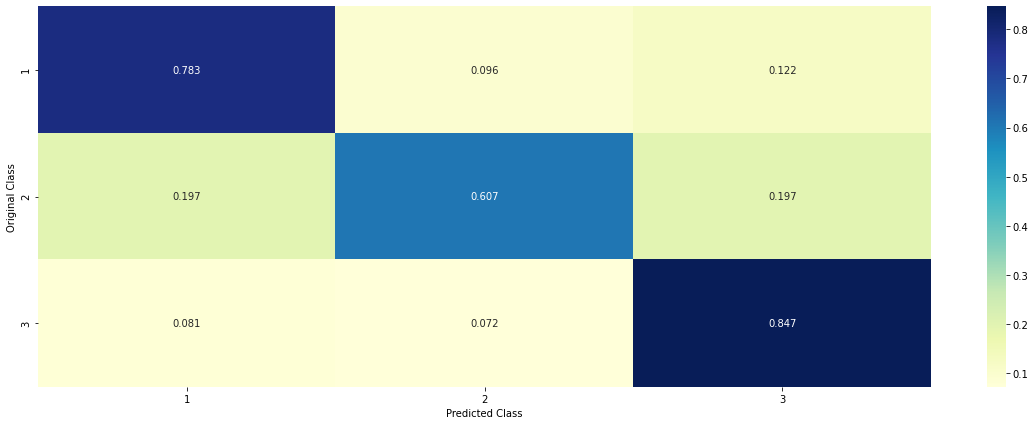

In [20]:
plot_confusion_matrix(Y_test, pred_random)

## Now Trying Gradient Boosting

In [21]:
clf1 = GradientBoostingClassifier(random_state=0)
clf1.fit(train_x_responseCoding,Y_train)
GradientBoostingClassifier(random_state=0)
pred_grad= clf1.predict(test_x_responding)
pred_grad2 = clf1.predict(train_x_responseCoding)

/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [22]:
print("DecisionTrees's TRAIN Accuracy: GradBoost ", metrics.accuracy_score(Y_train, pred_grad2))
print("DecisionTrees's TESTAccuracy: GradBoost ", metrics.accuracy_score(Y_test, pred_grad))

DecisionTrees's TRAIN Accuracy: GradBoost  0.9048034934497816
DecisionTrees's TESTAccuracy: GradBoost  0.7735191637630662


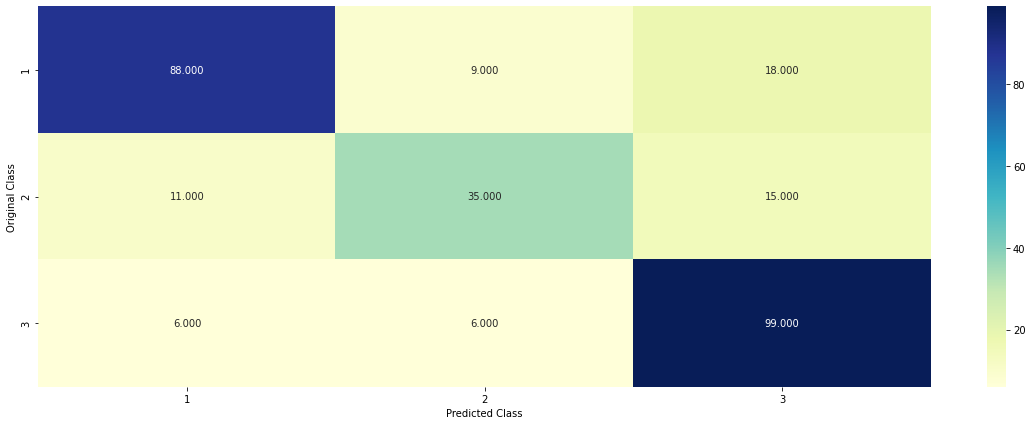

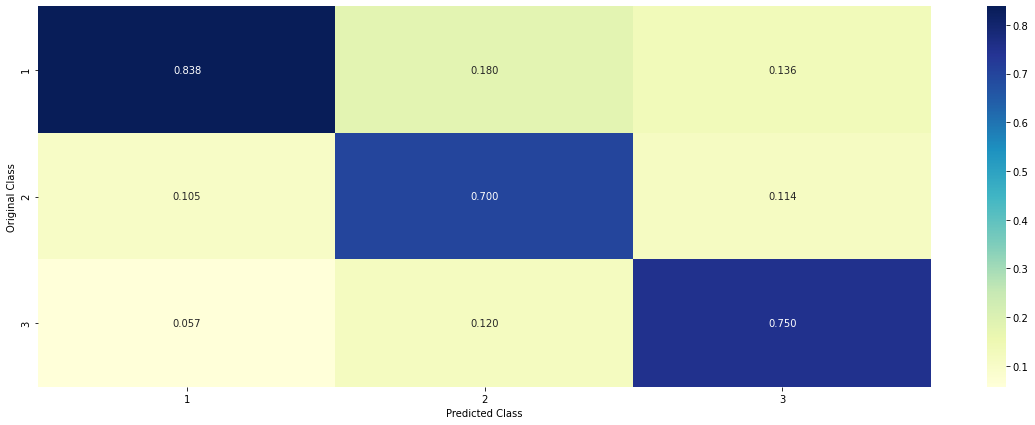

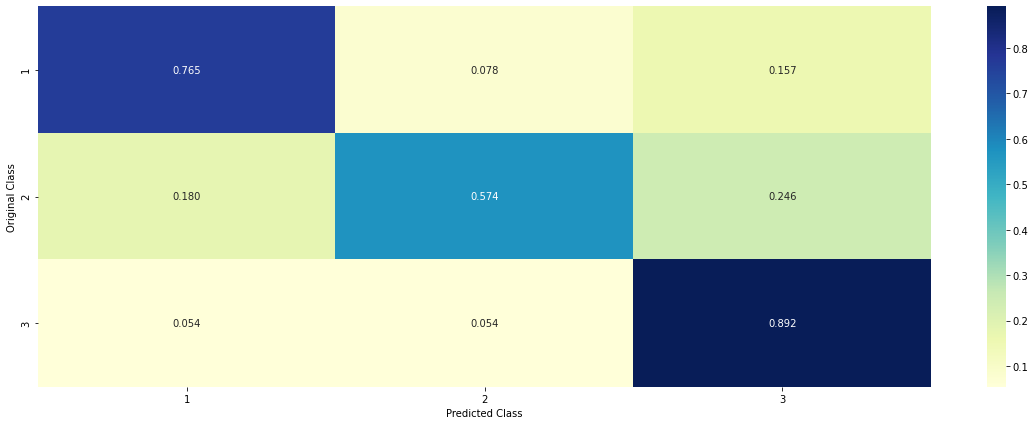

In [23]:
plot_confusion_matrix(Y_test, pred_grad)

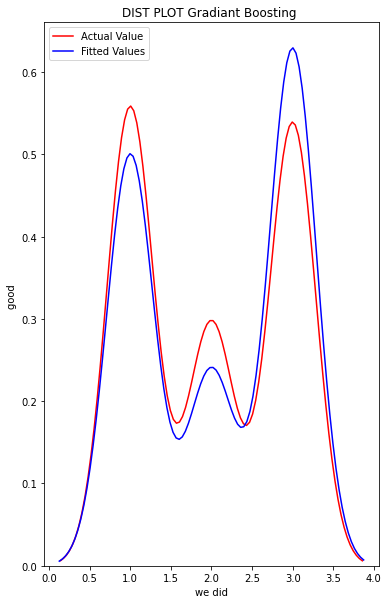

In [24]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred_grad, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('DIST PLOT Gradiant Boosting ')
plt.xlabel('we did')
plt.ylabel('good ')
plt.show()
plt.close()